# Import libraries and load dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

## Read Data set

In [6]:
 df = pd.read_csv("train.csv")

In [8]:
df = pd.read_csv("train.csv",index_col="id")

In [10]:
df.head(5)

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
df.tail(5)

,keyword,location,text,target
id,,,,
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
10872,NaN,NaN,Police investigating after an e-bike collided ...,1
10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


## Get shape of data

In [15]:
df.shape

(7613, 4)

## Get Feature names of dataset

In [18]:
df.keys()

Index(['keyword', 'location', 'text', 'target'], dtype='object')

In [20]:
df.columns

Index(['keyword', 'location', 'text', 'target'], dtype='object')

## Get full Decription

In [23]:
df.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [25]:
df.describe(include="all")

,keyword,location,text,target
count,7552,5080,7613,7613.00000
unique,221,3341,7503,NaN
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,45,104,10,NaN
mean,NaN,NaN,NaN,0.42966
std,NaN,NaN,NaN,0.49506
min,NaN,NaN,NaN,0.00000
25%,NaN,NaN,NaN,0.00000
50%,NaN,NaN,NaN,0.00000
75%,NaN,NaN,NaN,1.00000


## Get full info about all variables

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


In [30]:
df.isnull()

,keyword,location,text,target
id,,,,
1,True,True,False,False
4,True,True,False,False
5,True,True,False,False
6,True,True,False,False
7,True,True,False,False
...,...,...,...,...
10869,True,True,False,False
10870,True,True,False,False
10871,True,True,False,False


In [32]:
df.isnull().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

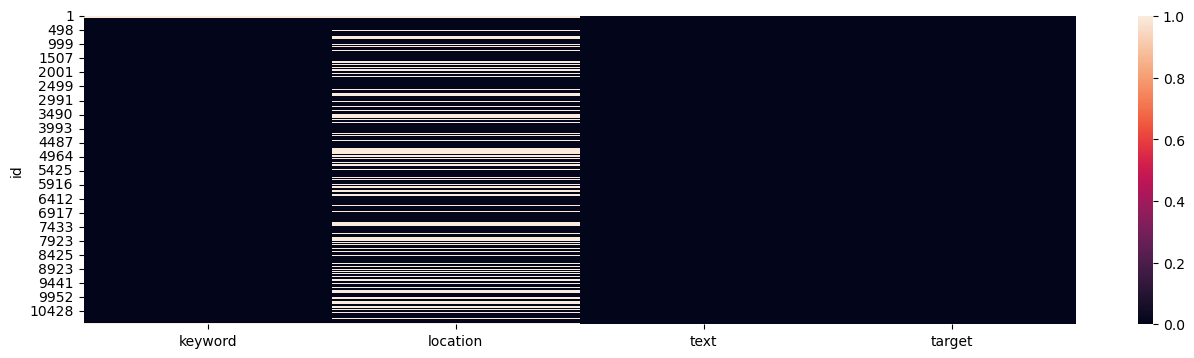

In [34]:
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull())
plt.show()

In [36]:
for k in df.keys():
    print(k,df[k].unique()[:5])

keyword [nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident']
location [nan 'Birmingham' 'Est. September 2012 - Bristol' 'AFRICA'
 'Philadelphia, PA']
text ['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
 'Forest fire near La Ronge Sask. Canada'
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"
 '13,000 people receive #wildfires evacuation orders in California '
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']
target [1 0]


In [38]:
df.location.isnull().sum()

2533

In [40]:
df.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [42]:
df.location.value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [44]:
df.location.mode()

0    USA
Name: location, dtype: object

In [46]:
most_frequent_location = df['location'].mode()[0]

In [48]:
df['location'] = df['location'].apply(lambda x: most_frequent_location if pd.isna(x) else x)

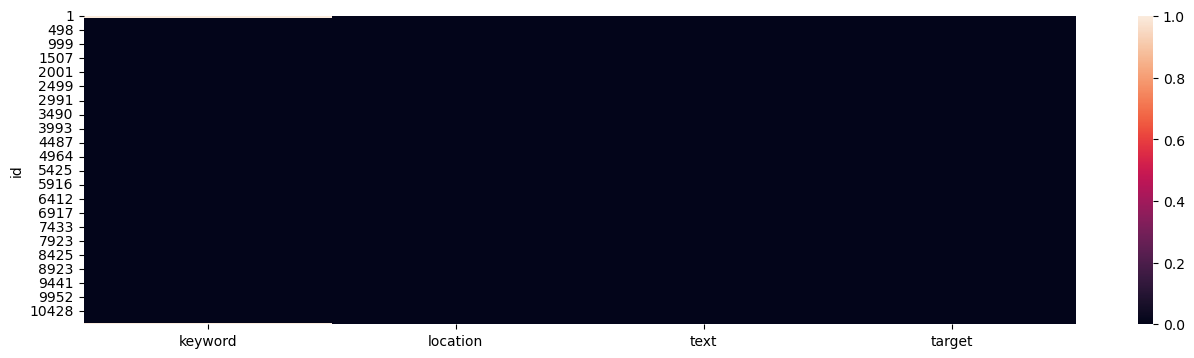

In [50]:
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull())
plt.show()

In [52]:
df.isnull().sum()

keyword     61
location     0
text         0
target       0
dtype: int64

In [54]:
df.head(2)

,keyword,location,text,target
id,,,,
1,NaN,USA,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,USA,Forest fire near La Ronge Sask. Canada,1


In [56]:
df.text[20]

'Damage to school bus on 80 in multi car crash #BREAKING '

In [58]:
df.text[520]

'.: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: RT DrAyesha4: #IndiaKoMunTorJawabDo\n\nIndian Army ki\x89Û_ http://t.co/WJLJq3yA4g'

In [60]:
df.text[890]

'Bioterrorism public health superbug biolabs epidemics biosurveillance outbreaks | Homeland Security News Wire http://t.co/cvhYGwcBZv'

In [62]:
df.text[1890]

'Flames visible from fire in Tucson mountains: A lightning-caused fire burning in steep rocky terrain in mountains\x89Û_ http://t.co/zRTRPL77QV'

In [66]:
import re
from nltk.corpus import stopwords

In [74]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [76]:
from nltk.corpus import stopwords

In [82]:
def text_cleaning(text):
    text = re.sub(r"https?://[a-zA-Z0-9./]+", " ", text)
    text = re.sub(r"[^a-zA-Z0-9\s]+", " ", text)
    text = re.sub(r"\b\d+(?:th)?\b", " ", text)
    text = re.sub(r"\b[a-zA-Z0-9]\b", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
    cleaned_text = text_cleaning(df['text'][300])
df['cleaned_text'] = df['text'].apply(text_cleaning)

In [6]:
df.text = df.text.map(textCleaning)

NameError: name 'df' is not defined

In [86]:
df.head(3)

,keyword,location,text,target,cleaned_text
id,,,,,
1,NaN,USA,Our Deeds are the Reason of this earthquake Ma...,1,Our Deeds are the Reason of this earthquake Ma...
4,NaN,USA,Forest fire near La Ronge Sask Canada,1,Forest fire near La Ronge Sask Canada
5,NaN,USA,All residents asked to shelter in place are be...,1,All residents asked to shelter in place are be...


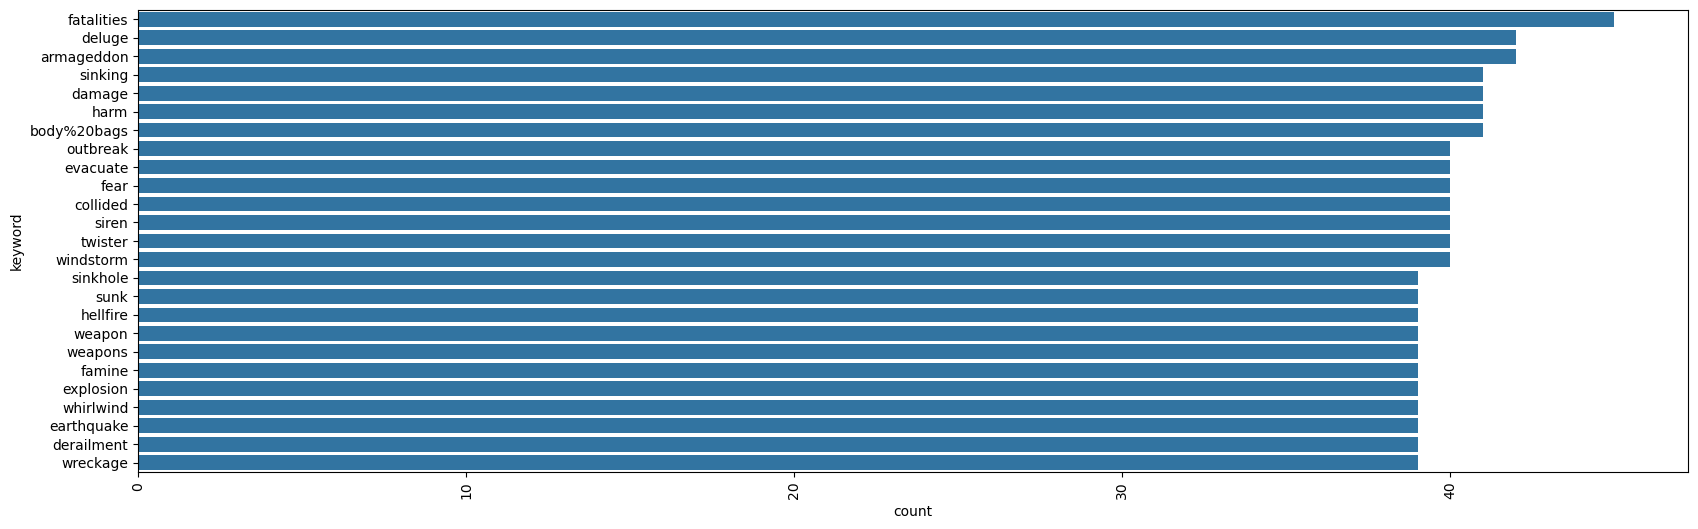

In [88]:
plt.figure(figsize=(20,6))
sns.countplot(df.keyword,order=df.keyword.value_counts().index[:25])
plt.xticks(rotation=90)
plt.show()

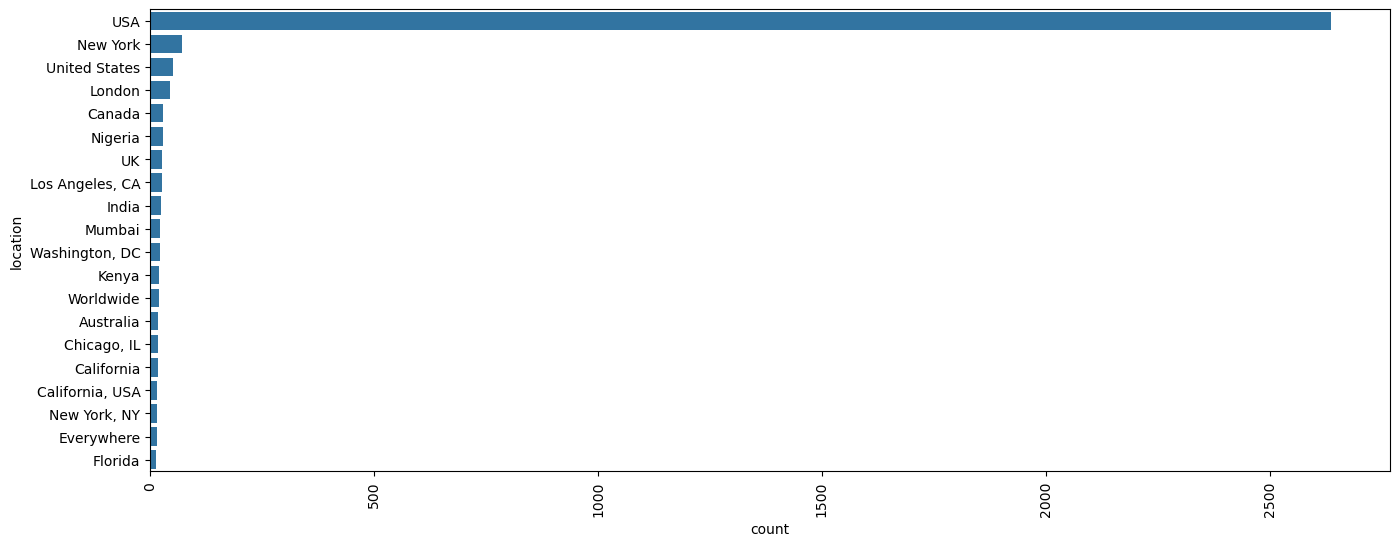

In [90]:
plt.figure(figsize=(16,6))
sns.countplot(df.location,order=df.location.value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='target', ylabel='Count'>

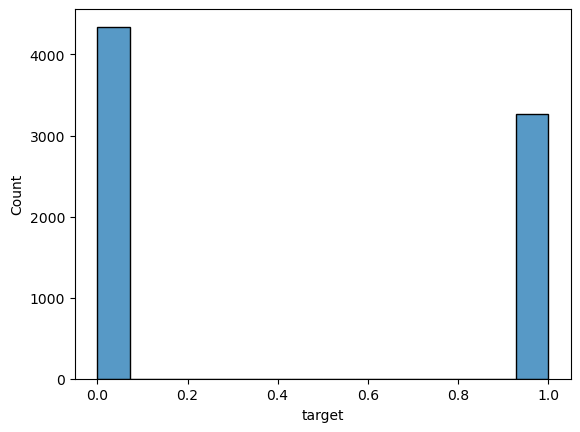

In [92]:
sns.histplot(df.target)

In [94]:
df.head(2)

,keyword,location,text,target,cleaned_text
id,,,,,
1,NaN,USA,Our Deeds are the Reason of this earthquake Ma...,1,Our Deeds are the Reason of this earthquake Ma...
4,NaN,USA,Forest fire near La Ronge Sask Canada,1,Forest fire near La Ronge Sask Canada


In [96]:
top_locations = df['location'].value_counts().index[:100]

In [8]:
df_top = df[df['location'].isin(top_locations)]
plt.figure(figsize=(20,6))

for target_value in df_top['target'].unique():
    subset = df_top[df_top['target'] == target_value]
    counts = subset['location'].value_counts().reindex(top_locations)
    plt.bar(counts.index, counts.values, label=f'Target {target_value}')
    plt.xticks(rotation=60)
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

NameError: name 'df' is not defined

In [100]:
df.text

id
1        Our Deeds are the Reason of this earthquake Ma...
4                    Forest fire near La Ronge Sask Canada
5        All residents asked to shelter in place are be...
6         people receive wildfires evacuation orders in...
7        Just got sent this photo from Ruby Alaska as s...
                               ...                        
10869    Two giant cranes holding bridge collapse into ...
10870     aria ahrary TheTawniest The out of control wi...
10871      M1 UTC 5km of Volcano Hawaii http co zDtoyd8EbJ
10872    Police investigating after an bike collided wi...
10873    The Latest More Homes Razed by Northern Califo...
Name: text, Length: 7613, dtype: object

In [102]:
full_txt = " ".join(df.text[df.target == 1])

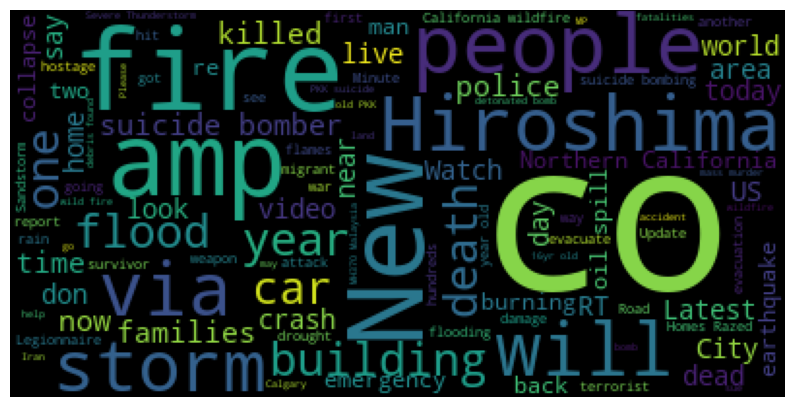

In [104]:
wc = WordCloud()
img = wc.generate_from_text(full_txt)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [106]:
full_txt = " ".join(df.text[df.target == 0])

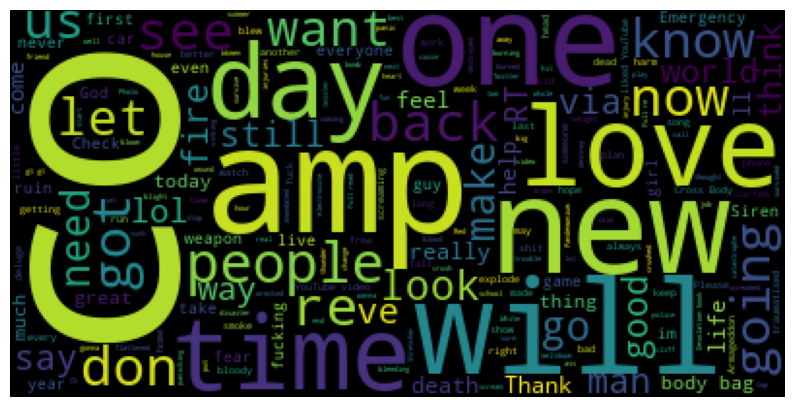

In [108]:
wc = WordCloud()
img = wc.generate_from_text(full_txt)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [2]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
disaster_tweets = tweets_df[tweets_df['target'] == 1]['cleaned_text']
all_words = ' '.join(disaster_tweets).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plotting the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Most Common Keywords in Disaster-Related Tweets')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'tweets_df' is not defined

In [4]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
disaster_tweets = df[df['target'] == 1]['cleaned_text']
all_words = ' '.join(disaster_tweets).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plotting the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Most Common Keywords in Disaster-Related Tweets')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'df' is not defined